In [161]:
using CSV
df = CSV.read.(filter(x->occursin(r".TXT",x), readdir()), 
    delim = '\t', header = ["ID", "Timestamp", "T (*C)", "RH (%)", "P (hPa)", "VOC (arb)", "PM (ug/m3)"], 
    dateformat = "yyyy-mm-dd HH:MM:SS");

In [162]:
first(df[1], 5)

,ID,Timestamp,T (*C),RH (%),P (hPa),VOC (arb),PM (ug/m3)
,String⍰,DateTime⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,EBAM,2019-10-11T12:25:48,23.35,56.61,851.13,0.0,6.0
2,EBAM,2019-10-11T12:36:16,22.98,57.51,851.13,4.72,3.8
3,EBAM,2019-10-11T12:46:44,22.52,57.79,851.09,6.92,3.0
4,EBAM,2019-10-11T12:57:12,22.01,60.65,851.11,8.97,4.4
5,EBAM,2019-10-11T13:07:40,21.43,60.56,851.09,11.02,3.0


In [163]:
using Dates
df[1][:Timestamp] = df[1][:Timestamp] .+ (Day(10) + Minute(125));

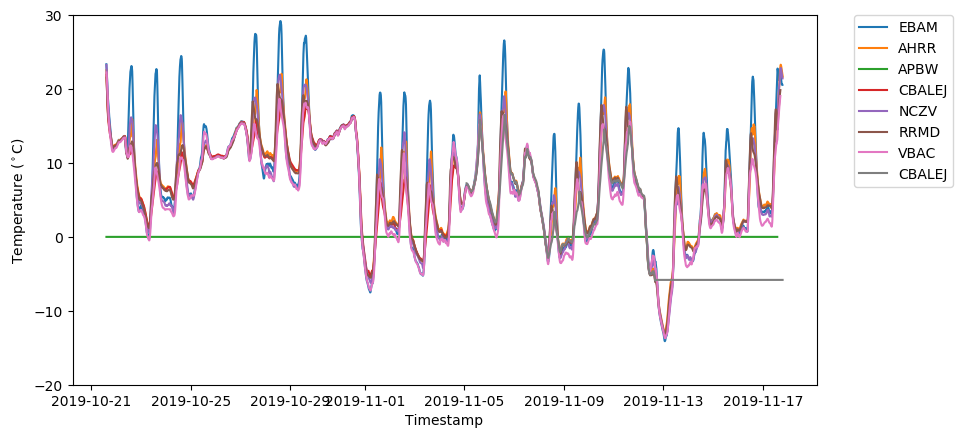

In [164]:
using PyPlot

w, h = plt.figaspect(0.5)
figure(figsize=(w,h))

for i in 1:8
    plot(df[i][:,2], df[i][:,3], label = df[i][1,1]);
end
xlabel("Timestamp"); ylabel(string("Temperature (", L"^\circ", "C)"));
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0);
ax = gca();
ax.set_ylim(-20, 30);

In [165]:
for i in 1:8
    df[i]
end

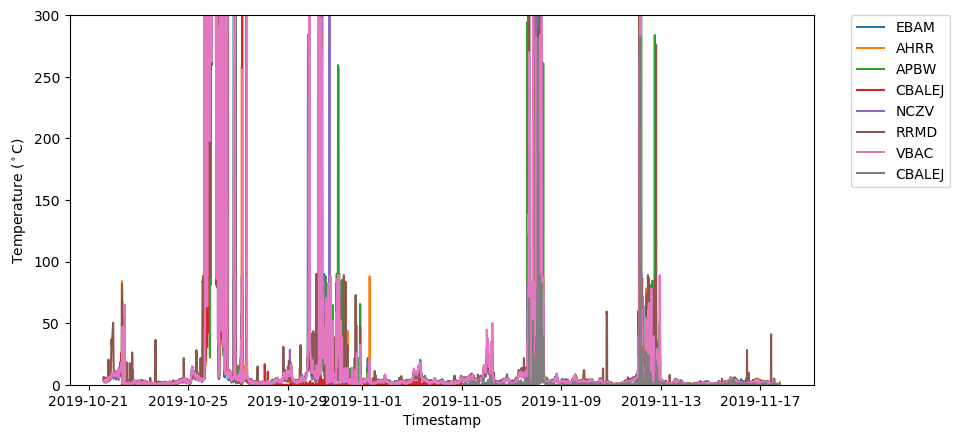

In [166]:
w, h = plt.figaspect(0.5)
figure(figsize=(w,h))

for i in 1:8
    plot(df[i][:,2], df[i][:,7], label = df[i][1,1]);
end
xlabel("Timestamp"); ylabel(string("Temperature (", L"^\circ", "C)"));
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0);
ax = gca();
ax.set_ylim(0, 300);

In [167]:
using DataFrames
for i in 1:8
    df[i] = deleterows!(df[i], df[i][4] .> 80)
end

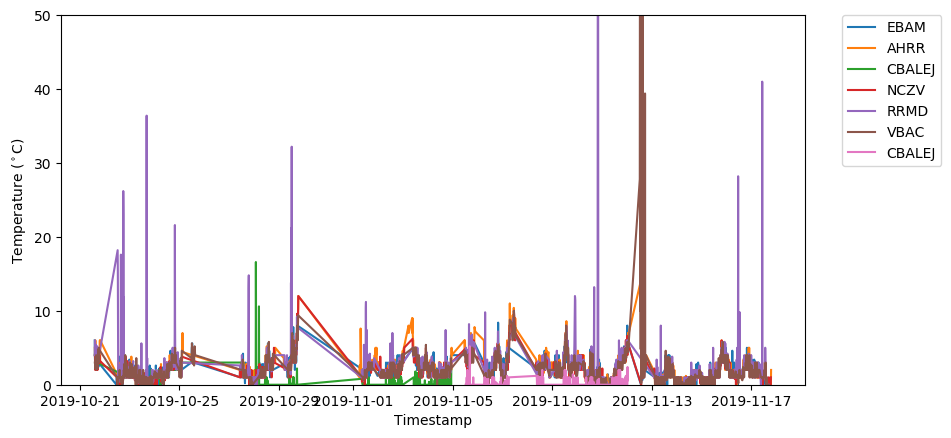

In [168]:
w, h = plt.figaspect(0.5)
figure(figsize=(w,h))

for i in 1:8
    if i != 3
    plot(df[i][:,2], df[i][:,7], label = df[i][1,1]);
    end
end
xlabel("Timestamp"); ylabel(string("Temperature (", L"^\circ", "C)"));
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0);
ax = gca();
ax.set_ylim(0, 50);